<center>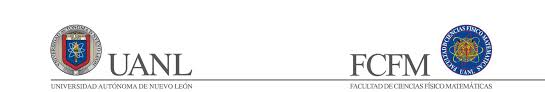  </center>


<h1>  <center>  Aprendizaje Automatizado   </center>    <h1> 

<t1>    <center>    <b> Practica 3: Modelo de Clasificacion (Renta de bicicletas (SEUL) </center>  </t1>

<t1>   <center>   
   <b>   Nombre  </b>    Cynthia  Selene Martínez Espinoza <b>  Matricula   </b> 1011238                            
</center>   </t1>

<h2> Carga de Librerias / funciones </h2>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, r2_score, confusion_matrix, roc_curve,  precision_recall_curve

<h2> Carga de datos </h2>

In [2]:
# Leer los datos de archivo csv, typed_uanl.csv con el URL
url =  "C:/Users/PC/Documents/GitHub/GitFlow-en-Github/ML003/Practica 3/Practica/RentasBicicletasSEUL.csv"
df = pd.read_csv(url)

In [3]:
# Mostrar las primeras filas del DataFrame
print(df.head())

         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   


In [4]:
# Seleccionar características y etiquetas
X = df.drop(['Rented Bike Count', 'Date', 'Seasons', 'Holiday', 'Functioning Day'], axis=1)
y = (df['Rented Bike Count'] > 500).astype(int)  # Etiqueta: 1 si > 500 bicicletas rentadas, 0 si no


In [5]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [6]:
# Convertir características categóricas a variables dummy
X = pd.get_dummies(X, drop_first=True)

In [7]:
X.head(5)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


<h2> Encontrar al mejor modelo, con Validacion Cruzada  </h2>

In [8]:
# Preprocesar los datos: convertir columnas categóricas a numéricas y manejar valores faltantes si los hay
df['Seasons'] = df['Seasons'].astype('category').cat.codes
df['Holiday'] = df['Holiday'].astype('category').cat.codes
df['Functioning Day'] = df['Functioning Day'].astype('category').cat.codes

In [9]:
# Crear una variable binaria de clasificación basada en un umbral de renta de bicicletas
umbral = df['Rented Bike Count'].median()
df['High Demand'] = (df['Rented Bike Count'] > umbral).astype(int)

In [10]:
# Selección de características y variable objetivo
funciones = [
    'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 
    'Visibility (10m)', 'Dew point temperature(°C)', 
    'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 
    'Seasons', 'Holiday', 'Functioning Day'
]
X = df[funciones]
y = df['High Demand']

In [23]:
# Dividir en conjunto de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Normalizar las características
DatosEscalados = StandardScaler()
X_entrenamiento = DatosEscalados.fit_transform(X_entrenamiento)
X_prueba = DatosEscalados.transform(X_prueba)

In [13]:
# Definir los modelos de clasificación
modelos = {
    'KNN': KNeighborsClassifier(),
    'Arbol de decision': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'Regresion Logistica': LogisticRegression()
}

In [14]:
# Validación cruzada,  encontrar el mejor modelo de clasificación basado en el criterio de precisión
criteriopuntuacion = 'accuracy'
resultados = {}
for nombre, modelo in modelos.items():
    puntos = cross_val_score(modelo, X_entrenamiento, y_entrenamiento, cv=5, scoring=criteriopuntuacion)
    resultados[nombre] = puntos.mean()

In [15]:
# Encontrar el mejor modelo de clasificación
Mejor_Modelo_Nombre = max(resultados, key=resultados.get)
Mejor_Modelo = modelos[Mejor_Modelo_Nombre]

In [16]:
# Mostrar resultados
print(f"Resultados de la Validación Cruzada (Accuracy): {resultados}")
print(f"El mejor modelo es: {Mejor_Modelo_Nombre} con una Accuracy de {resultados[Mejor_Modelo_Nombre]:.4f}")

Resultados de la Validación Cruzada (Accuracy): {'KNN': 0.8939786233798765, 'Arbol de decision': 0.9032532295558197, 'SVM': 0.8837052400924141, 'Regresion Logistica': 0.8621576599555443}
El mejor modelo es: Arbol de decision con una Accuracy de 0.9033


<h2> Entrenar mejor modelo encontrado en validacion cruzada</h2>

In [17]:
# Entrenar el mejor modelo en todo el conjunto de datos de entrenamiento
Mejor_Modelo.fit(X_entrenamiento, y_entrenamiento)

DecisionTreeClassifier()

In [18]:
# Evaluar el modelo en el conjunto de prueba
y_prediccion = Mejor_Modelo.predict(X_prueba)

In [19]:
# Evaluar varias métricas
accuracy = accuracy_score(y_prueba, y_prediccion)
precision = precision_score(y_prueba, y_prediccion)
recall = recall_score(y_prueba, y_prediccion)
f1 = f1_score(y_prueba, y_prediccion)
roc_auc = roc_auc_score(y_prueba, Mejor_Modelo.predict_proba(X_prueba)[:, 1])

In [20]:
# Mostrar resultados
print(f"\nEvaluación en el conjunto de prueba:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Evaluación en el conjunto de prueba:
Accuracy: 0.9144
Precision: 0.9183
Recall: 0.9077
F1 Score: 0.9130
ROC AUC: 0.9143


In [31]:
# Entrenar el modelo de árbol de decisión
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_entrenamiento, y_entrenamiento) 

# Realizar predicciones
y_prediccion = tree.predict(X_prueba)

# Evaluar el modelo
mse = mean_squared_error(y_prueba, y_prediccion)
r2 = r2_score(y_prueba, y_prediccion)

# Mostrar los resultados
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Visualizar la importancia de las características
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]


Mean Squared Error: 0.08618721461187215
R^2 Score: 0.6552147479131234


<h2> Grafica </h2>

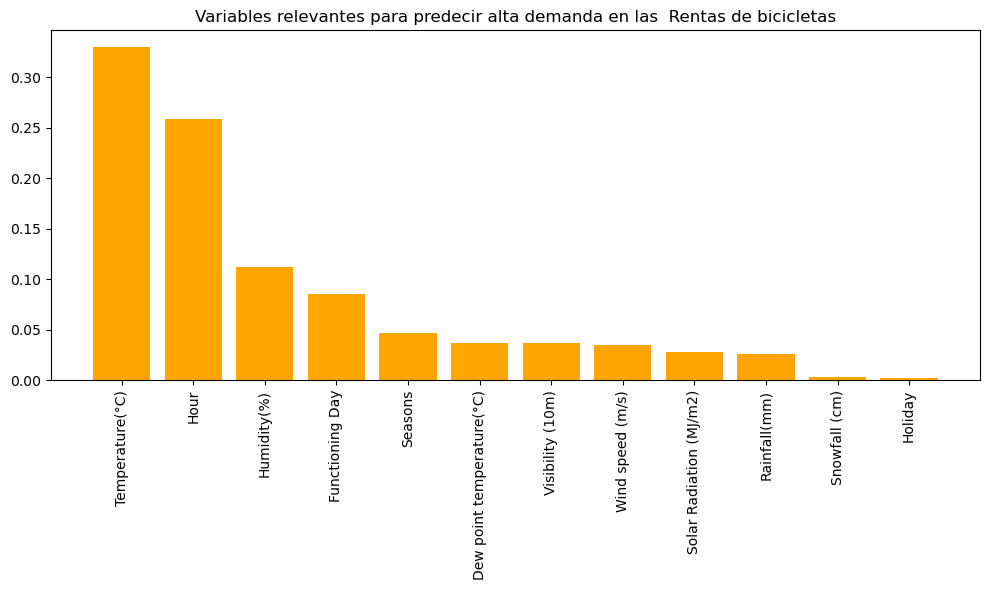

In [35]:
plt.figure(figsize=(10, 6))
plt.title("Variables relevantes para predecir alta demanda en las  Rentas de bicicletas")
plt.bar(range(X.shape[1]), importances[indices], align="center" , color="orange")
plt.xticks(range(X.shape[1]), [funciones[i] for i in indices], rotation=90)
plt.tight_layout()
plt.savefig("C:/Users/PC/Documents/GitHub/GitFlow-en-Github/ML003/Practica 3/Practica/GraficaBarraVariablesrelevantes.png")
plt.show()
plt.close()

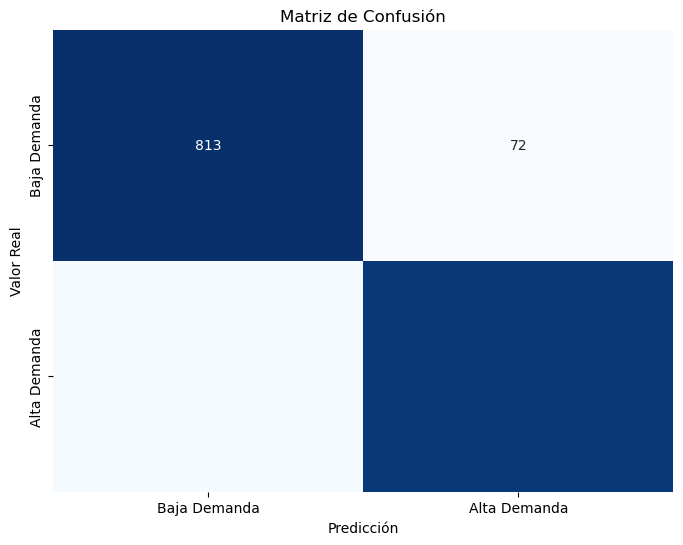

In [40]:
# Matriz de Confusión
conf_matrix = confusion_matrix(y_prueba, y_prediccion)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Baja Demanda', 'Alta Demanda'], 
            yticklabels=['Baja Demanda', 'Alta Demanda'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.savefig("C:/Users/PC/Documents/GitHub/GitFlow-en-Github/ML003/Practica 3/Practica/GraficaConfusionDemanda.png")
plt.show()
plt.close()
plt.show()



<h2> Analisis de resultados </h2>

 <t2>   

El modelo de árbol de decisión ha mostrado ser el mejor modelo de clasificación según la métrica de accuracy tanto en la validación cruzada como en el conjunto de prueba. Un accuracy de 0.9144 indica que el modelo predice correctamente si habrá alta demanda de bicicletas en aproximadamente el 91.44% de los casos

La precisión de 0.9183 y el recall de 0.9077 sugieren que el modelo es muy bueno tanto para identificar correctamente los períodos de alta demanda (recall) como para asegurar que las predicciones de alta demanda son correctas (precisión).

Las variables como la hora del día, la temperatura, la humedad, y las condiciones meteorológicas tienen una influencia significativa en la demanda de bicicletas.

Con un accuracy superior al 90%, y métricas de precisión, recall, F1 y ROC AUC que reflejan un rendimiento robusto, el modelo proporciona una base sólida para la toma de decisiones operativas y estratégicas.
    
</t2>